# CPR appropriation

## Pre-requisites

In [21]:
%%capture
!pip install src/gym_cpr_grid
!pip install -r requirements.txt

In [22]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from IPython import display

from src import models, policies, rllib

%load_ext tensorboard
%load_ext autoreload
%autoreload 2

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of gym_cpr_grid failed: Traceback (most recent call last):
  File "/Users/jobs/Github/cpr-appropriation/venv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jobs/Github/cpr-appropriation/venv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 855, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/jobs/Github/cpr-app

## Utilities

In [23]:
wandb_api_key = open("./wandb_api_key_file", "r").read().strip()
wandb_project = "cpr-appropriation"

In [24]:
n_agents = 11
grid_width = 39
grid_height = 19
max_steps = 1000
max_episodes = 4000
seed = 42
rllib_log_dir = "./rllib_logs/"

In [26]:
env = gym.make(
    'gym_cpr_grid:CPRGridEnv-v0', 
    n_agents=n_agents, 
    grid_width=grid_width, 
    grid_height=grid_height,
)

## Random

KeyboardInterrupt: 

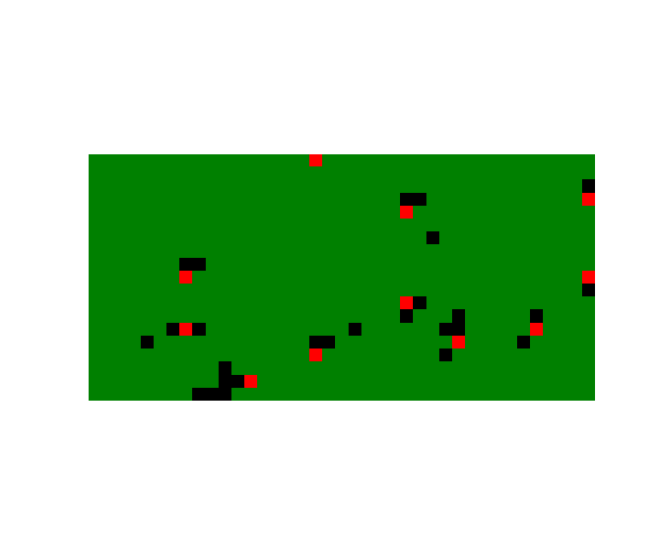

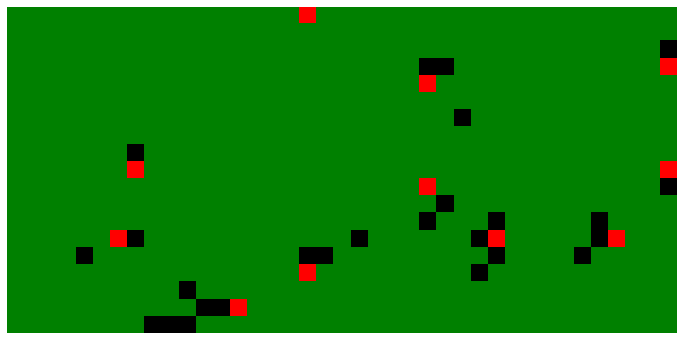

In [27]:
observations = env.reset()
fig, ax, img = env.plot(env.render('rgb_array'))
for _ in range(env.max_steps):
    display.display(plt.gcf())
    action_dict = {h: env.action_space.sample() for h in range(env.n_agents)}
    print(action_dict)
    observations, rewards, dones, infos = env.step(action_dict)
    print(infos)
    display.clear_output(wait=True)
    img.set_data(env.render(mode='rgb_array'))
env.close()

## DQN baseline

### Without tagging

In [37]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=False,
    gifting_mechanism=None,
    num_workers=1,
    jupyter=True,
    seed=seed
)

Trial name,status,loc,episodes,U,E,S,P
DQN_gym_cpr_grid:CPRGridEnv-v0_70c20_00000,TERMINATED,,2,2.45176,0.860419,273.469,nan


2021-08-23 16:36:55,307	INFO tune.py:550 -- Total run time: 52.93 seconds (52.72 seconds for the tuning loop).


### With tagging

In [222]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=True,
    gifting_mechanism=None,
    num_workers=1,
    jupyter=True,
    seed=seed
)

TypeError: dqn_baseline() missing 1 required positional argument: 'max_episodes'

### With gifting

#### Zero sum

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=False,
    gifting_mechanism=0,
    num_workers=1,
    jupyter=True,
    seed=seed
)

#### Fixed budget

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=False,
    gifting_mechanism=1,
    num_workers=1,
    jupyter=True,
    seed=seed
)

#### Replenishable budget

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=False,
    gifting_mechanism=2,
    num_workers=1,
    jupyter=True,
    seed=seed
)

## Policy gradient methods

In [193]:
policy_nn = models.MLP(env.observation_space_size(), [32, 32], env.action_space_size())
baseline_nn = models.MLP(env.observation_space_size(), [32, 32], 1)

In [194]:
policy_nn

MLP(
  (mlp): Sequential(
    (0): Linear(in_features=1260, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=9, bias=True)
    (5): ReLU()
  )
  (out): LogSoftmax(dim=None)
)

In [195]:
baseline_nn

MLP(
  (mlp): Sequential(
    (0): Linear(in_features=1260, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
    (5): ReLU()
  )
  (out): LogSoftmax(dim=None)
)

## VPG

In [199]:
vpg_policy = policies.VPGPolicy(env, policy_nn, reset_parameters=True, baseline_nn=baseline_nn)
vpg_policy.train(1)

[MLP(
  (mlp): Sequential(
    (0): Linear(in_features=1260, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=9, bias=True)
    (5): ReLU()
  )
  (out): LogSoftmax(dim=None)
), Sequential(
  (0): Linear(in_features=1260, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=9, bias=True)
  (5): ReLU()
), Linear(in_features=1260, out_features=32, bias=True), ReLU(), Linear(in_features=32, out_features=32, bias=True), ReLU(), Linear(in_features=32, out_features=9, bias=True), ReLU(), LogSoftmax(dim=None)]
[MLP(
  (mlp): Sequential(
    (0): Linear(in_features=1260, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
    (5): ReLU()
  )
  (out): Log

wandb: ERROR Control-C detected -- Run data was not synced


2021-08-23 12:36:03.768 | INFO     | src.policies:train:76 - Epoch 1 / 1
/Users/jobs/Github/cpr-appropriation/src/models.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
2021-08-23 12:36:03.780 | INFO     | src.policies:execute_episode:195 - Early stopping, all agents done
2021-08-23 12:36:03.790 | INFO     | src.policies:execute_episode:195 - Early stopping, all agents done
2021-08-23 12:36:03.800 | INFO     | src.policies:execute_episode:195 - Early stopping, all agents done
2021-08-23 12:36:03.856 | INFO     | src.policies:execute_episode:195 - Early stopping, all agents done
2021-08-23 12:36:03.865 | INFO     | src.policies:execute_episode:195 - Early stopping, all agents done
2021-08-23 12:36:03.874 | INFO     | src.policies:execute_episode:195 - Early stopping, all agents done
2021-08-23 12:36:03.883 | INFO     | src.policies:execute_episode:195 - Early stopping, all agents done
2021-08-23 12:36:03

efficiency,0.625
equality,8.66667
sustainability,9336.0
peace,28.0
loss,9332.28125
_runtime,2
_timestamp,1629714964
_step,0


efficiency,▁
equality,▁
sustainability,▁
peace,▁
loss,▁
_runtime,▁
_timestamp,▁
_step,▁


## TRPO

In [154]:
trpo_policy = policies.TRPOPolicy(env, policy_nn, baseline_nn, reset_parameters=True, beta=1.0, kl_target=0.01)
trpo_policy.train(1)

2021-08-23 10:25:23.754 | INFO     | src.policies:train:45 - Epoch 1 / 1
2021-08-23 10:25:23.765 | INFO     | src.policies:execute_episode:149 - Early stopping, all agents done
2021-08-23 10:25:26.532 | INFO     | src.policies:execute_episode:149 - Early stopping, all agents done
2021-08-23 10:25:26.540 | INFO     | src.policies:execute_episode:149 - Early stopping, all agents done
2021-08-23 10:25:26.550 | INFO     | src.policies:execute_episode:149 - Early stopping, all agents done
2021-08-23 10:25:26.559 | INFO     | src.policies:execute_episode:149 - Early stopping, all agents done
2021-08-23 10:25:26.569 | INFO     | src.policies:execute_episode:149 - Early stopping, all agents done
2021-08-23 10:25:26.578 | INFO     | src.policies:execute_episode:149 - Early stopping, all agents done
2021-08-23 10:25:26.588 | INFO     | src.policies:execute_episode:149 - Early stopping, all agents done
2021-08-23 10:25:26.597 | INFO     | src.policies:execute_episode:149 - Early stopping, all age

## PPO

In [166]:
ppo_policy = policies.PPOPolicy(env, policy_nn, baseline_nn, reset_parameters=True, c1=1.0, c2=0.0, eps=0.2)
ppo_policy.train(1)

2021-08-23 10:33:56.186 | INFO     | src.policies:train:51 - Epoch 1 / 1
/Users/jobs/Github/cpr-appropriation/src/models.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
2021-08-23 10:33:59.245 | INFO     | src.policies:execute_episode:155 - Early stopping, all agents done
2021-08-23 10:33:59.253 | INFO     | src.policies:execute_episode:155 - Early stopping, all agents done
2021-08-23 10:33:59.265 | INFO     | src.policies:execute_episode:155 - Early stopping, all agents done
2021-08-23 10:33:59.334 | INFO     | src.policies:execute_episode:155 - Early stopping, all agents done
2021-08-23 10:33:59.716 | INFO     | src.policies:execute_episode:155 - Early stopping, all agents done
2021-08-23 10:33:59.724 | INFO     | src.policies:execute_episode:155 - Early stopping, all agents done
2021-08-23 10:33:59.734 | INFO     | src.policies:execute_episode:155 - Early stopping, all agents done
2021-08-23 10:33:59